In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/PublicBike

/content/drive/MyDrive/PublicBike


# Load Data

In [14]:
import pandas as pd

df = pd.read_csv('SeoulBikeData.csv', encoding='cp1252')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Preprocessing

One-Hot Encoding

In [19]:
one_hot_encoded1 = pd.get_dummies(df['Seasons'], prefix='Seasons')
one_hot_encoded2 = pd.get_dummies(df['Holiday'], prefix='Holiday')
one_hot_encoded3 = pd.get_dummies(df['Functioning Day'], prefix='Functioning Day')
# Concatenate the one-hot encoded DataFrames
encoded_df = pd.concat([df, one_hot_encoded1, one_hot_encoded2, one_hot_encoded3], axis=1)
# Drop the original columns that were encoded
encoded_df = encoded_df.drop(['Seasons', 'Holiday', 'Functioning Day'], axis=1)

In [20]:
encoded_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,0,0,0,1,0,1


### groupby

In [25]:
grouped_df = encoded_df.groupby('Date').agg({'Hour': lambda x: (x * df['Rented Bike Count']).sum(), 
                                     'Rented Bike Count': 'sum', 
                                     'Temperature(°C)': 'mean',
                                     'Humidity(%)': 'mean',
                                     'Wind speed (m/s)': 'mean',
                                     'Visibility (10m)': 'mean',
                                     'Dew point temperature(°C)': 'mean',
                                     'Solar Radiation (MJ/m2)': 'mean',
                                     'Rainfall(mm)': 'mean',
                                     'Snowfall (cm)': 'mean',
                                     'Seasons_Autumn': 'max',
                                     'Seasons_Spring': 'max',
                                     'Seasons_Summer': 'max',
                                     'Seasons_Winter': 'max',
                                     'Holiday_Holiday': 'max',
                                     'Holiday_No Holiday': 'max'
                                     })
grouped_df = grouped_df.rename(columns={'Hour': 'TotalRentedHour',
                                     'Seasons_Autumn': 'Autumn',
                                     'Seasons_Spring': 'Spring',
                                     'Seasons_Summer': 'Summer',
                                     'Seasons_Winter': 'Winter',
                                     'Holiday_Holiday': 'Holiday',
                                     'Holiday_No Holiday': 'No_Holiday'
                                        })

In [46]:
grouped_df.columns

Index(['TotalRentedHour', 'Rented Bike Count', 'Temperature(°C)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Autumn', 'Spring', 'Summer', 'Winter', 'Holiday',
       'No_Holiday'],
      dtype='object')

### seperate each month

In [96]:
# Convert the 'Date' column to a datetime object
grouped_df.index = pd.to_datetime(grouped_df.index)

# Create a new column called 'Month' containing the month of each date
grouped_df['Month'] = grouped_df.index.to_series().dt.month
grouped_df['day'] = grouped_df.index.to_series().dt.day
grouped_df['year'] = grouped_df.index.to_series().dt.year

# Create an empty list to store the filtered DataFrames
daily_df = []

# Iterate over a range of months and filter the DataFrame for each month
for month in range(1, 13):
  filtered_df = grouped_df[(grouped_df.index.year == 2018) & (grouped_df['Month'] == month)]
  daily_df.append(filtered_df)

daily_df[0]

,TotalRentedHour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Winter,Holiday,No_Holiday,Month,day,year
Date,,,,,,,,,,,,,,,,,,,
2018-01-01,54246.0,4290,-1.283333,39.333333,1.454167,1894.833333,-13.866667,0.255833,0.000000,0.000000,0,0,0,1,1,0,1,1,2018
2018-01-02,72477.0,5377,-3.866667,44.000000,1.608333,1923.625000,-15.012500,0.337083,0.000000,0.904167,0,0,0,1,0,1,1,2,2018
2018-01-03,71812.0,5132,0.450000,64.208333,3.554167,1084.000000,-6.387500,0.747500,0.104167,0.000000,0,1,0,0,1,0,1,3,2018
2018-01-04,250357.0,17388,15.183333,68.916667,1.570833,831.833333,9.370833,0.302083,0.000000,0.000000,0,1,0,0,0,1,1,4,2018
2018-01-05,380070.0,26820,20.341667,72.791667,1.437500,456.458333,15.120833,0.517500,0.000000,0.000000,0,1,0,0,1,0,1,5,2018
2018-01-06,455016.0,31928,23.708333,50.125000,1.954167,1598.166667,11.862500,1.164167,0.000000,0.000000,0,0,1,0,0,1,1,6,2018
2018-01-07,9719.0,3231,22.025000,93.458333,0.783333,933.791667,20.833333,0.087083,3.375000,0.000000,0,0,1,0,0,1,1,7,2018
2018-01-08,281344.0,20712,33.429167,55.791667,1.683333,1853.458333,22.829167,1.070417,0.000000,0.000000,0,0,1,0,0,1,1,8,2018
2018-01-09,355236.0,26010,25.454167,61.208333,1.208333,1839.083333,16.725000,0.875417,0.000000,0.000000,1,0,0,0,0,1,1,9,2018


Categorized by *month*

In [89]:
monthly_df = grouped_df.groupby(grouped_df.index.month)['TotalRentedHour'].sum()

Date
1      3905742.0
2      3661577.0
3      6392073.0
4      7944420.0
5      9530707.0
6     10130046.0
7      9789470.0
8      8714536.0
9      7084125.0
10     8783363.0
11     6794892.0
12     4295557.0
Name: TotalRentedHour, dtype: float64

Categorized by *date*

In [93]:
# Group the DataFrame by the day of the year and calculate the sum of 'TotalRentedHour' for each day
daily_sum = grouped_df.groupby(grouped_df.index.strftime('%j'))['TotalRentedHour'].sum()

# Print the resulting Series
print(daily_sum)

Date
001     54246.0
002     72477.0
003     71812.0
004    250357.0
005    380070.0
         ...   
361     71334.0
362     89038.0
363     98891.0
364     42737.0
365     50446.0
Name: TotalRentedHour, Length: 365, dtype: float64


## Visualization

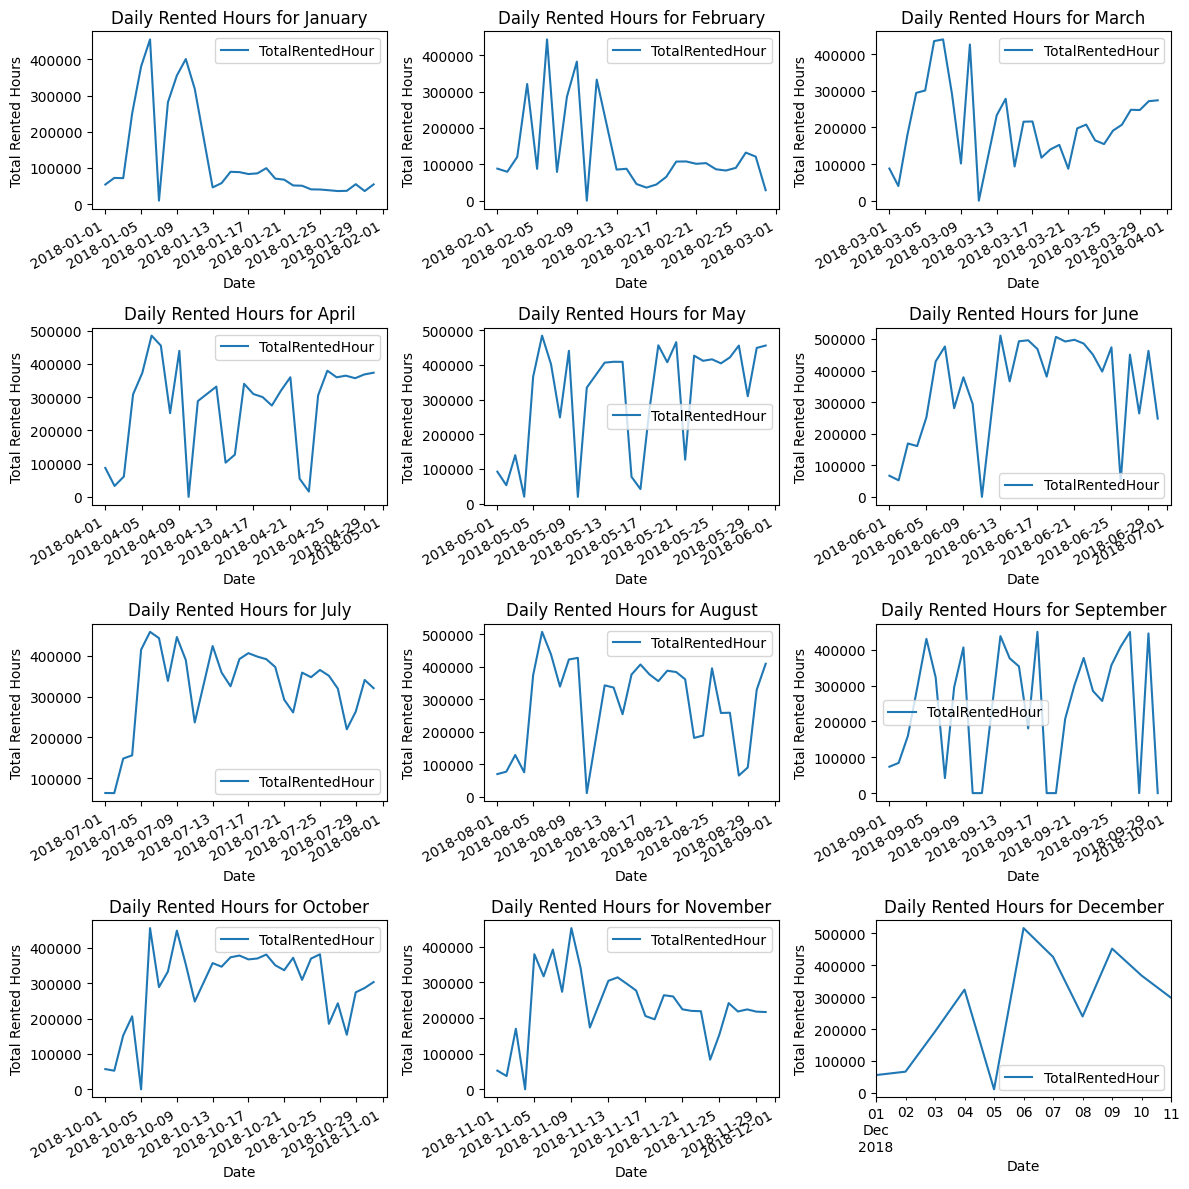

In [85]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))

# Iterate over the list of monthly DataFrames
for i, daily in enumerate(daily_df):
    # Plot the 'TotalRentedHour' column for each day in the month in a subplot
    ax = axes[i // 3, i % 3]
    daily.plot(ax=ax, y='TotalRentedHour', kind='line', title='Daily Rented Hours for {}'.format(daily.index[0].strftime('%B')))
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Rented Hours')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

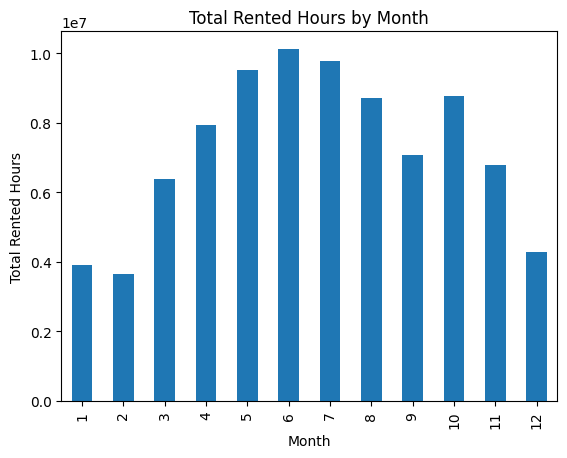

In [69]:
# Plot the monthly sum of rented hours
monthly_df.plot(kind='bar', x='Month', y='TotalRentedHour', title='Total Rented Hours by Month')
plt.xlabel('Month')
plt.ylabel('Total Rented Hours')
plt.show()

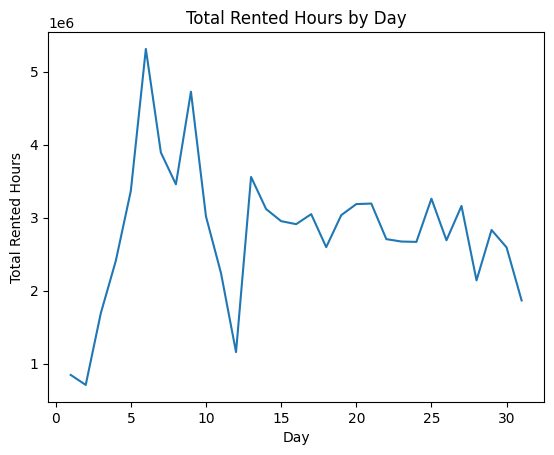

In [94]:
# Group the DataFrame by the day of the month and calculate the sum of 'TotalRentedHour' for each day
daily_sum = grouped_df.groupby(grouped_df.index.day)['TotalRentedHour'].sum()

# Plot the daily sum of rented hours
daily_sum.plot(kind='line', x='Day', y='TotalRentedHour', title='Total Rented Hours by Day')
plt.xlabel('Day')
plt.ylabel('Total Rented Hours')
plt.show()

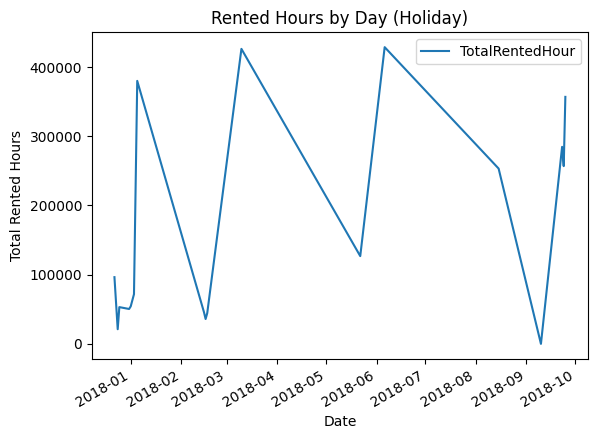

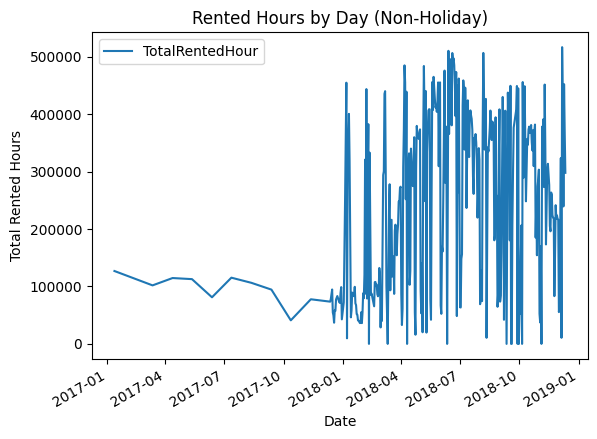

In [95]:
# Separate the DataFrame into holiday and non-holiday days
holiday_df = grouped_df[grouped_df['Holiday'] == 1]
non_holiday_df = grouped_df[grouped_df['Holiday'] == 0]

# Plot the 'TotalRentedHour' column for each day in the holiday days
holiday_df.plot(y='TotalRentedHour', kind='line', title='Rented Hours by Day (Holiday)')
plt.xlabel('Date')
plt.ylabel('Total Rented Hours')
plt.show()

# Plot the 'TotalRentedHour' column for each day in the non-holiday days
non_holiday_df.plot(y='TotalRentedHour', kind='line', title='Rented Hours by Day (Non-Holiday)')
plt.xlabel('Date')
plt.ylabel('Total Rented Hours')
plt.show()

### Pairplot

In [ ]:
import seaborn as sns

# Create a pairplot of the DataFrame
sns.pairplot(df)
plt.show()

## Model

### Prepare for build

In [156]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score

df = grouped_df

X = df[['Temperature(°C)',
        'Humidity(%)',
        'Wind speed (m/s)',
        'Visibility (10m)',
        'Dew point temperature(°C)',
        'Solar Radiation (MJ/m2)',
        'Rainfall(mm)',
        'Snowfall (cm)',
        'Autumn',
        'Spring',
        'Summer',
        'Winter',
        'Holiday',
        'No_Holiday']].values

y = df['TotalRentedHour'].values


### Linear Regression

In [152]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the linear regression model
LR_model = LinearRegression()

# Fit the model to the training data
LR_model.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = LR_model.predict(X_test)

In [146]:
# Calculate the R-squared score for the testing data
r2 = r2_score(y_test, y_pred)
print('Linear Regression: R-squared score:', r2)

# Calculate the root mean squared error for the testing data
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Linear Regression: Root Mean Squared Error:', rmse)

Linear Regression: R-squared score: 0.6307396711320765
Linear Regression: Root Mean Squared Error: 98370.10732646559


In [147]:
# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.0410958904109589
Precision: 0.0410958904109589
Recall: 0.0410958904109589
F1 score: 0.0410958904109589


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "Only 'saga' solver supports elasticnet penalty, got solver={}.".format(


In [154]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVR models with different kernel functions
linear_model = SVR(kernel='linear')
poly_model = SVR(kernel='poly', degree=3)
rbf_model = SVR(kernel='rbf', gamma='scale')
sigmoid_model = SVR(kernel='sigmoid', gamma='scale', coef0=0.1)

# Fit the models to the training data
linear_model.fit(X_train, y_train)
poly_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)
sigmoid_model.fit(X_train, y_train)

# Predict the target values for the test data using the models with different kernels
linear_pred = linear_model.predict(X_test)
poly_pred = poly_model.predict(X_test)
rbf_pred = rbf_model.predict(X_test)
sigmoid_pred = sigmoid_model.predict(X_test)

# Calculate evaluation metrics for the models with different kernels
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)
rbf_mse = mean_squared_error(y_test, rbf_pred)
rbf_r2 = r2_score(y_test, rbf_pred)
sigmoid_mse = mean_squared_error(y_test, sigmoid_pred)
sigmoid_r2 = r2_score(y_test, sigmoid_pred)

# Print the evaluation metrics for the models with different kernels
print('Linear kernel - Mean Squared Error:', linear_mse, 'R-squared score:', linear_r2)
print('Polynomial kernel - Mean Squared Error:', poly_mse, 'R-squared score:', poly_r2)
print('RBF kernel - Mean Squared Error:', rbf_mse, 'R-squared score:', rbf_r2)
print('Sigmoid kernel - Mean Squared Error:', sigmoid_mse, 'R-squared score:', sigmoid_r2)

Linear kernel - Mean Squared Error: 18449198677.785774 R-squared score: 0.2634059740937623
Polynomial kernel - Mean Squared Error: 25047028999.85425 R-squared score: -1.5895010524458186e-05
RBF kernel - Mean Squared Error: 25048689069.62 R-squared score: -8.217417491507284e-05
Sigmoid kernel - Mean Squared Error: 25049089495.435555 R-squared score: -9.816138762319682e-05


In [161]:
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 0.5, 1, 10, 100, 150, 500, 1000],
    'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100],
    'epsilon': [0.001, 0.1, 0.2, 0.5, 1, 10, 100]
}

# Initialize the SVM model with the 'rbf' kernel
model = SVR(kernel='linear')

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Predict the target values for the test data using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics using the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared score:', r2)

Best hyperparameters: {'C': 1000, 'epsilon': 100, 'gamma': 0.001}
Mean Squared Error: 10095215978.652836
R-squared score: 0.5969431567202718


In [157]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared score:', r2)

Mean Squared Error: 13060259296.424658
R-squared score: 0.4785622322927152


## Check which feature matters most (XAI)

In [ ]:
%pip install xai

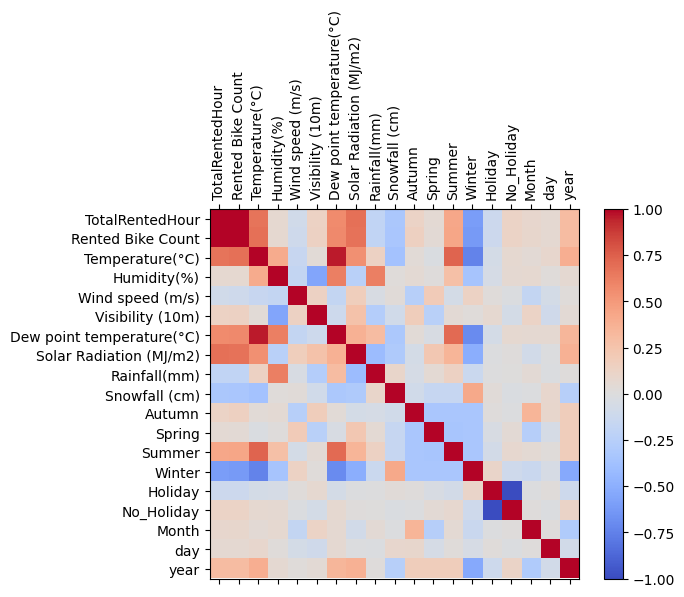

In [116]:
_ = xai.correlations(df, include_categorical=True, plot_type="matrix")